Pre-Processing Data

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Downloading historical data
nasdaq = yf.download("^IXIC", start="2010-01-01", end="2023-05-01")
nifty = yf.download("^NSEI", start="2010-01-01", end="2023-05-01")
print(nasdaq)
print(nifty)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2009-12-31   2292.919922   2293.590088   2269.110107   2269.149902   
2010-01-04   2294.409912   2311.149902   2294.409912   2308.419922   
2010-01-05   2307.270020   2313.729980   2295.620117   2308.709961   
2010-01-06   2307.709961   2314.070068   2295.679932   2301.090088   
2010-01-07   2298.090088   2301.300049   2285.219971   2300.050049   
...                  ...           ...           ...           ...   
2023-04-24  12053.469727  12103.580078  11960.299805  12037.200195   
2023-04-25  11968.809570  11990.459961  11798.769531  11799.160156   
2023-04-26  11913.230469  11967.990234  11833.070312  11854.349609   
2023-04-27  11972.150391  12154.009766  11950.919922  12142.240234   
2023-04-28  12117.5400

In [3]:
merged_df = pd.merge(nasdaq, nifty, on="Date", how="inner")
merged_df

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
Date,,,,,,,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24,12053.469727,12103.580078,11960.299805,12037.200195,12037.200195,4854050000,17707.550781,17754.500000,17612.500000,17743.400391,17743.400391,255700
2023-04-25,11968.809570,11990.459961,11798.769531,11799.160156,11799.160156,4806020000,17761.550781,17807.449219,17716.849609,17769.250000,17769.250000,297400
2023-04-26,11913.230469,11967.990234,11833.070312,11854.349609,11854.349609,5281970000,17767.300781,17827.750000,17711.199219,17813.599609,17813.599609,233000


In [4]:
nasdaq_price = merged_df["Adj Close_x"]
nifty_price = merged_df["Adj Close_y"]
print(nasdaq_price, nifty_price)

Date
2010-01-04     2308.419922
2010-01-05     2308.709961
2010-01-06     2301.090088
2010-01-07     2300.050049
2010-01-08     2317.169922
                  ...     
2023-04-24    12037.200195
2023-04-25    11799.160156
2023-04-26    11854.349609
2023-04-27    12142.240234
2023-04-28    12226.580078
Name: Adj Close_x, Length: 3182, dtype: float64 Date
2010-01-04     5232.200195
2010-01-05     5277.899902
2010-01-06     5281.799805
2010-01-07     5263.100098
2010-01-08     5244.750000
                  ...     
2023-04-24    17743.400391
2023-04-25    17769.250000
2023-04-26    17813.599609
2023-04-27    17915.050781
2023-04-28    18065.000000
Name: Adj Close_y, Length: 3182, dtype: float64


Lead lag relationship between the two Indices

In [5]:
corr_coef = np.corrcoef(nasdaq_price, nifty_price)
corr_coef[0][1]

0.9513138758576783

In [6]:
max_lag = 20
lags = np.arange(-max_lag, max_lag+1)

In [7]:
len = nasdaq_price.size
correlations  = []
for i in range(0, 21):
    corr = np.corrcoef(nasdaq_price[i:len-20+i], nifty_price[20:len])
    correlations.append(corr[0][1])

for i in range(1, 21):
    corr = np.corrcoef(nasdaq_price[20:len], nifty_price[20-i:len-i])
    correlations.append(corr[0][1])

correlations

[0.9525880228566149,
 0.9525136663671727,
 0.9524557341651098,
 0.9524238508997114,
 0.9523954498281505,
 0.9523731937804181,
 0.9523558353488103,
 0.95236370880287,
 0.9523444630535891,
 0.9522943912018065,
 0.9522506099367279,
 0.9522123928819953,
 0.9521381123515572,
 0.9520267529367737,
 0.9518939302560472,
 0.9517796310436769,
 0.9516535763587782,
 0.9515287639755545,
 0.9514072756268365,
 0.9512735672262757,
 0.9509149115656326,
 0.9503922403341366,
 0.9499230604133949,
 0.9494323479981795,
 0.9489590829729201,
 0.9484461650108977,
 0.9479505664585285,
 0.9474436486206083,
 0.9468979952026612,
 0.9463815440501387,
 0.9458543481663826,
 0.945340774984265,
 0.9448217112772389,
 0.9442946642415444,
 0.9438292553871185,
 0.9433591110938602,
 0.9429114293146211,
 0.9424392131635188,
 0.9419371148173848,
 0.941444366544539,
 0.9409305687253505]

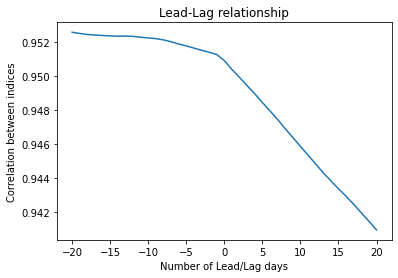

In [8]:
plt.plot(lags, correlations)
plt.xlabel("N0. of Lead/Lag days")
plt.ylabel("Correlation between indices")
plt.title("Lead-Lag relationship")
plt.show()

From the above graph, we can see that Nifty behind the Nasdaq. As the number of lag days is increasing for Nifty the correlation between Nifty and Nasdaq is increasing continously. So we should use Nasdaq for parameter optimisation as it will yield better results in the future.

Keltner Channel

In [9]:
data = pd.DataFrame()
data['KC_Close'] = merged_df['Close_y']
data['KC_EMA'] = nifty_price.rolling(window=20).mean()
data['KC_TR'] = merged_df['High_y'] - merged_df['Low_y']
data['KC_ATR'] = data['KC_TR'].rolling(window=10).mean()
data['KC_UB'] = data['KC_EMA'] + 2*data['KC_ATR']
data['KC_LB'] = data['KC_EMA'] - 2*data['KC_ATR']
data

,KC_Close,KC_EMA,KC_TR,KC_ATR,KC_UB,KC_LB
Date,,,,,,
2010-01-04,5232.200195,NaN,71.350098,NaN,NaN,NaN
2010-01-05,5277.899902,NaN,45.950195,NaN,NaN,NaN
2010-01-06,5281.799805,NaN,50.800293,NaN,NaN,NaN
2010-01-07,5263.100098,NaN,57.799805,NaN,NaN,NaN
2010-01-08,5244.750000,NaN,42.049805,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-04-24,17743.400391,17453.517676,142.000000,129.375000,17712.267676,17194.767676
2023-04-25,17769.250000,17484.385156,90.599609,128.819922,17742.025000,17226.745312
2023-04-26,17813.599609,17521.220117,116.550781,131.115039,17783.450195,17258.990039


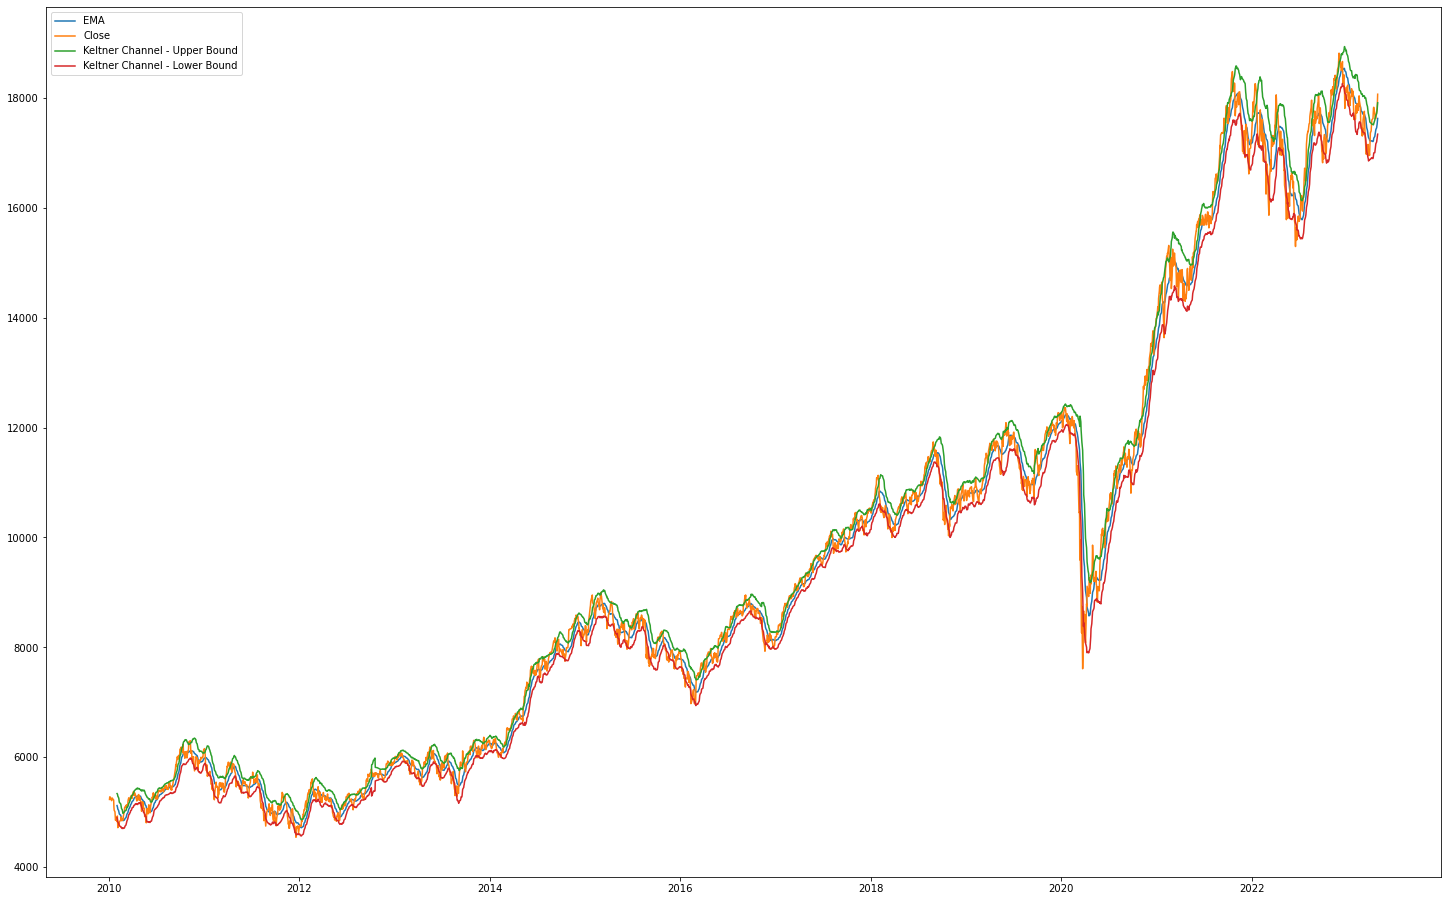

In [10]:
plt.figure(figsize=(25, 16))
plt.plot(data['KC_EMA'], label="EMA")
plt.plot(merged_df['Close_y'], label="Close")
plt.plot(data['KC_UB'], label="Keltner Channel - Upper Bound")
plt.plot(data['KC_LB'], label="Keltner Channel - Lower Bound")
plt.legend()
plt.show()

In [11]:
# KELTNER CHANNEL STRATEGY

def implement_kc_strategy(prices, kc_upper, kc_lower):
    buy_price = []
    sell_price = []
    kc_signal = []
    signal = 0
    
    for i in range(prices.size-1):
        if prices[i] < kc_lower[i] and prices[i+1] > prices[i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        elif prices[i] > kc_upper[i] and prices[i+1] < prices[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            kc_signal.append(0)
            
    return buy_price, sell_price, kc_signal


In [12]:
buy_price, sell_price, kc_signal = implement_kc_strategy(data['KC_Close'], data['KC_UB'], data['KC_LB'])
data=data.iloc[:-1,:]

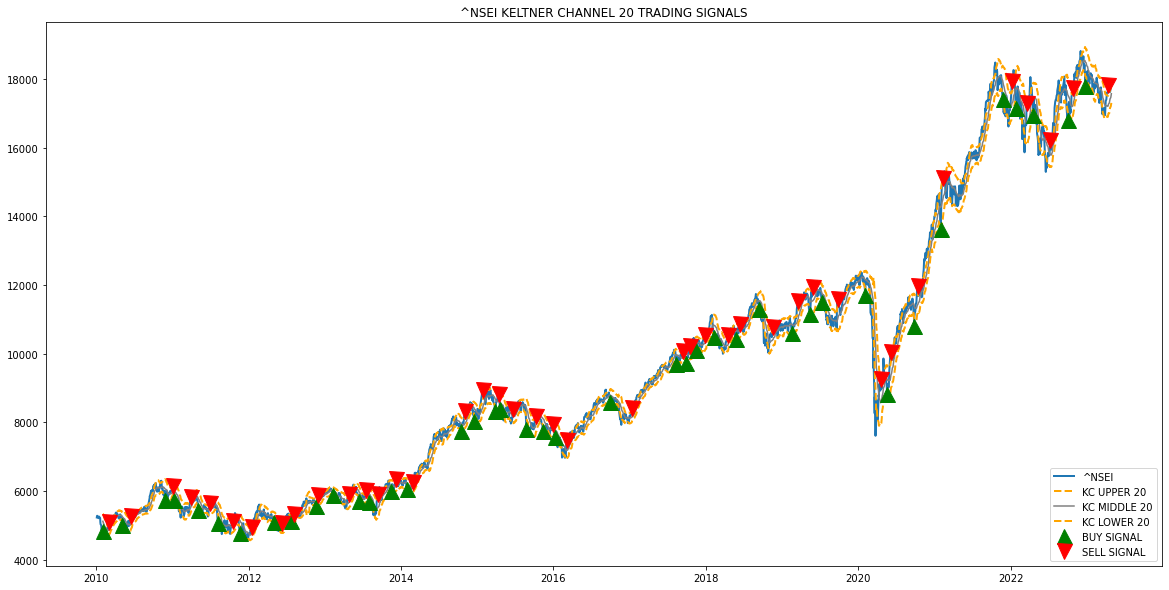

In [13]:

plt.figure(figsize=(20,10))
plt.plot(data['KC_Close'], linewidth = 2, label = '^NSEI')
plt.plot(data['KC_UB'], linewidth = 2, color = 'orange', linestyle = '--', label = 'KC UPPER 20')
plt.plot(data['KC_EMA'], linewidth = 1.5, color = 'grey', label = 'KC MIDDLE 20')
plt.plot(data['KC_LB'], linewidth = 2, color = 'orange', linestyle = '--', label = 'KC LOWER 20')
plt.plot(data.index, buy_price, marker = '^', color = 'green', markersize = 15, linewidth = 0, label = 'BUY SIGNAL')
plt.plot(data.index, sell_price, marker = 'v', color= 'r', markersize = 15, linewidth = 0, label = 'SELL SIGNAL')
plt.legend(loc = 'lower right')
plt.title('^NSEI KELTNER CHANNEL 20 TRADING SIGNALS')
plt.show()

In [14]:
buy_kc=pd.DataFrame(buy_price)
buy_kc=buy_kc.fillna(0)
buy_kc=buy_kc[~(buy_kc == 0).all(axis=1)]
sell_kc=pd.DataFrame(sell_price)
sell_kc=sell_kc.fillna(0)
sell_kc=sell_kc[~(sell_kc == 0).all(axis=1)]

In [15]:
np1=np.array(buy_kc)
np2=np.array(sell_kc)
(np2-np1).mean()
(np2-np1).std()

602.823566753307

In [16]:
buy_kelt=pd.DataFrame(buy_price)
sell_kelt=pd.DataFrame(sell_price)
buy_kelt=buy_kelt.fillna(0)
sell_kelt=sell_kelt.fillna(0)

In [17]:
import math
def sharpe_ratio(data, risk_free_rate=0):
    # Calculate Average  Return
    mean_daily_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_daily_return/sigma)

sharpe_ratio(np2-np1)

0.4359665984813923

In [18]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np2-np1)

0.31532429960191133

In [19]:
print("MDD_KC",(np1-np2).min()/np2[18,0]*100,"%")
print("CUMM_Return_KC",((np2-np1)/np1).max()*100,"%")

MDD_KC -17.67215168827271 %
CUMM_Return_KC 14.03450887923951 %


Bollinger Bands

In [20]:
data = pd.DataFrame()
data['BB_EMA'] = merged_df['Close_y'].rolling(window=20).mean()
data['BB_std'] = merged_df['Close_y'].rolling(window=20).std()
data['BB_UB'] = data['BB_EMA'] + (2 * data['BB_std'])
data['BB_LB'] = data['BB_EMA'] - (2 * data['BB_std'])

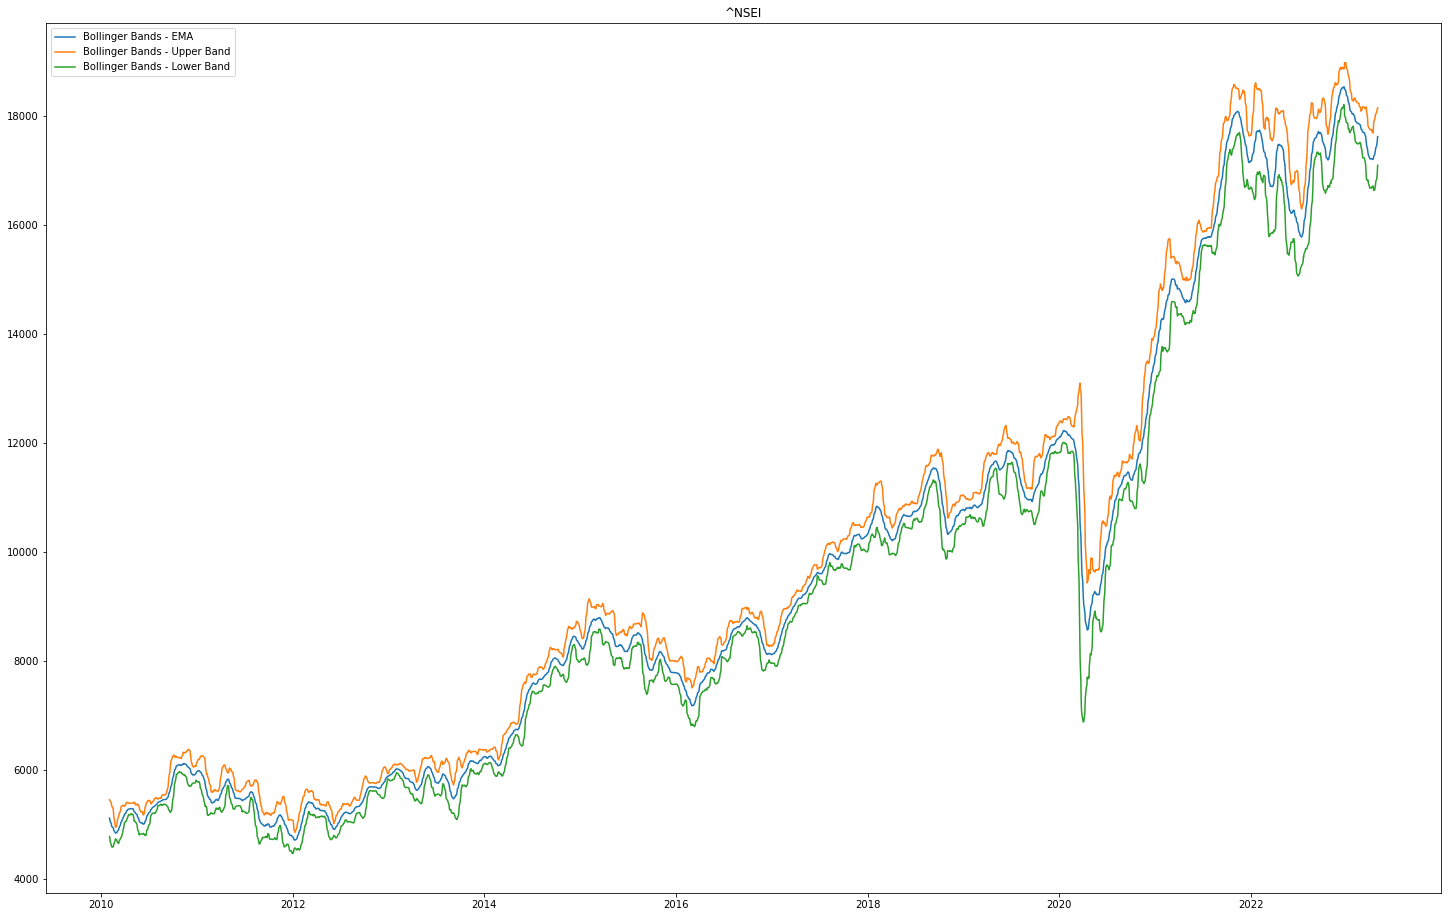

In [21]:
plt.figure(figsize=(25, 16))
plt.plot(data['BB_EMA'], label='Bollinger Bands - EMA')
plt.plot(data['BB_UB'], label='Bollinger Bands - Upper Band')
plt.plot(data['BB_LB'], label='Bollinger Bands - Lower Band')
plt.legend(loc='best')
plt.title("^NSEI")
plt.show()

In [22]:
#implementing Bollinger bands
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price_bb = []
    sell_price_bb = []
    bb_signal = []
    signal = 0
    
    for i in range(data.size):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price_bb.append(data[i])
                sell_price_bb.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price_bb.append(np.nan)
            sell_price_bb.append(np.nan)
            bb_signal.append(0)
            
    return buy_price_bb, sell_price_bb, bb_signal

In [23]:
buy_price_bb, sell_price_bb, bb_signal = implement_bb_strategy(merged_df['Close_y'], data['BB_UB'], data['BB_LB'])

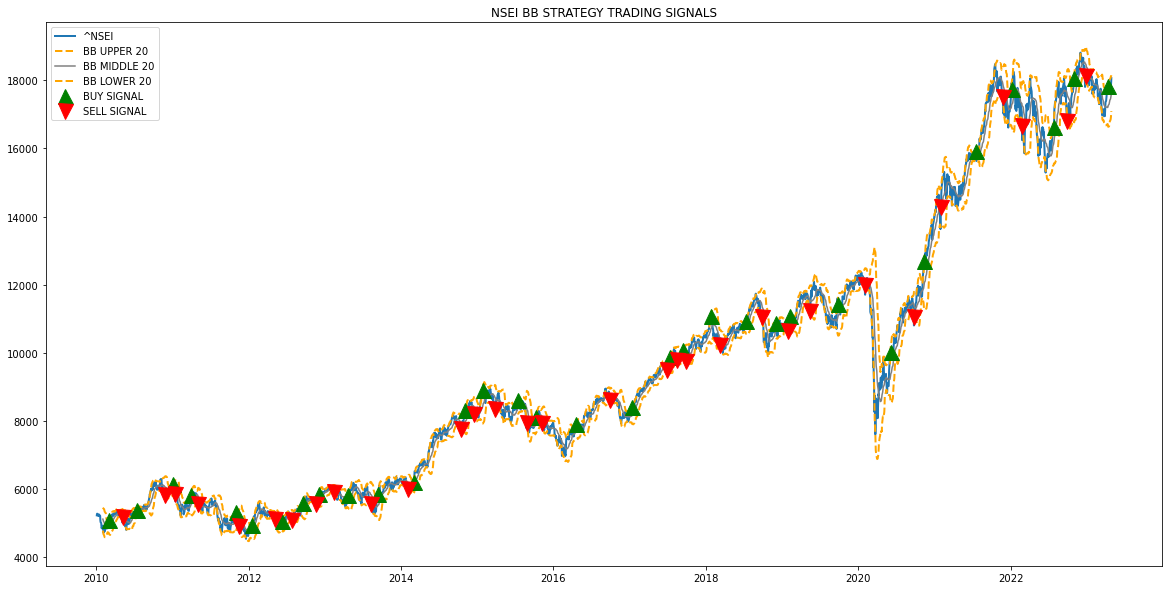

In [24]:
plt.figure(figsize=(20,10))
plt.plot(merged_df['Close_y'], linewidth = 2, label = '^NSEI')
plt.plot(data['BB_UB'], linewidth = 2, color = 'orange', linestyle = '--', label = 'BB UPPER 20')
plt.plot(data['BB_EMA'], linewidth = 1.5, color = 'grey', label = 'BB MIDDLE 20')
plt.plot(data['BB_LB'], linewidth = 2, color = 'orange', linestyle = '--', label = 'BB LOWER 20')
plt.plot(data.index, buy_price_bb, marker = '^', color = 'green', markersize = 15, linewidth = 0, label = 'BUY SIGNAL')
plt.plot(data.index, sell_price_bb, marker = 'v', color= 'r', markersize = 15, linewidth = 0, label = 'SELL SIGNAL')
plt.legend(loc = 'upper left')
plt.title('NSEI BB STRATEGY TRADING SIGNALS')
plt.show()

In [25]:
buy_price_bb=pd.DataFrame(buy_price_bb)
buy_price_bb=buy_price_bb.fillna(0)
buy_price_bb=buy_price_bb[~(buy_price_bb == 0).all(axis=1)]
sell_price_bb=pd.DataFrame(sell_price_bb)
sell_price_bb=sell_price_bb.fillna(0)
sell_price_bb=sell_price_bb[~(sell_price_bb == 0).all(axis=1)]

In [26]:
np_buy_bb=np.array(buy_price_bb)
np_buy_bb = np_buy_bb[:-1]
np_sell_bb=np.array(sell_price_bb)
(np_sell_bb-np_buy_bb).mean()

135.05331716229838

In [27]:
def sharpe_ratio(data, risk_free_rate=0.03):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_return/sigma)

sharpe_ratio(np_sell_bb-np_buy_bb)

0.20458586524142836

In [28]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np_sell_bb-np_buy_bb)

0.4628753060377374

In [29]:
print("MDD_BB",(np_buy_bb-np_sell_bb).min()/np_sell_bb[6,0]*100,"%")
print("CUMM_Return_BB",((np_sell_bb-np_buy_bb)/np_buy_bb).max()*100,"%")

MDD_BB -31.185238000542487 %
CUMM_Return_BB 25.046411223769834 %


MACD

In [30]:
data = pd.DataFrame()
data['Close'] = merged_df['Close_y']
data['MACD_12EMA'] = merged_df['Close_y'].ewm(span=12, adjust=False).mean()
data['MACD_26EMA'] = merged_df['Close_y'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['MACD_12EMA'] - data['MACD_26EMA']
data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
data

,Close,MACD_12EMA,MACD_26EMA,MACD,MACD_Signal
Date,,,,,
2010-01-04,5232.200195,5232.200195,5232.200195,0.000000,0.000000
2010-01-05,5277.899902,5239.230919,5235.585359,3.645561,0.729112
2010-01-06,5281.799805,5245.779979,5239.008651,6.771328,1.937555
2010-01-07,5263.100098,5248.444612,5240.793203,7.651410,3.080326
2010-01-08,5244.750000,5247.876211,5241.086299,6.789912,3.822243
...,...,...,...,...,...
2023-04-24,17743.400391,17612.018392,17523.287853,88.730539,57.779210
2023-04-25,17769.250000,17636.207870,17541.507271,94.700599,65.163488
2023-04-26,17813.599609,17663.498907,17561.662259,101.836647,72.498120


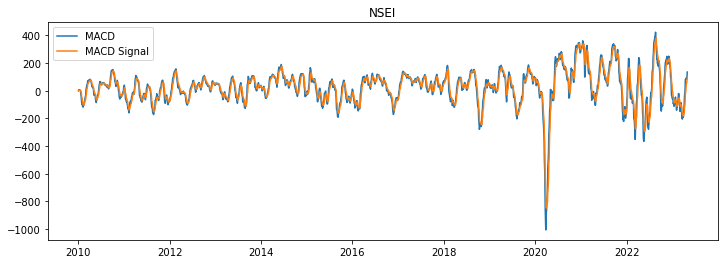

In [31]:
plt.figure(figsize=(12, 4))
plt.plot(data['MACD'], label='MACD')
plt.plot(data['MACD_Signal'], label='MACD Signal')

plt.legend()
plt.title("NSEI")
plt.show()

In [32]:
def generate_signals(df):
    buy_list = []
    sell_list = []
    flag = -1

    for i in range(0,df.shape[0]):
        if df['MACD'][i] > df['MACD_Signal'][i]:         # first occurence of MACD crossing above signal oine
            sell_list.append(np.nan)                 # so first flip above means buy
            if flag != 1:                            # after first occurence I record flip to ignore
                buy_list.append(df['Close'][i])      # from here onward
                flag = 1
            else:
                buy_list.append(np.nan)
        elif df['MACD'][i] < df['MACD_Signal'][i]:
            buy_list.append(np.nan)
            if flag != 0:
                sell_list.append(df['Close'][i])
                flag = 0
            else:
                sell_list.append(np.nan)
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)            


# create buy and sell column
signal = generate_signals(data)
data['buy_sig'] = signal[0]
data['sell_sig'] = signal[1]

In [33]:
buy_sig_md=pd.DataFrame(data['buy_sig']).fillna(0)
buy_sig_md

buy_sig_md=buy_sig_md[~(buy_sig_md == 0).all(axis=1)]
buy_sig_md
np_buy_md=np.array(buy_sig_md)

sell_sig_md=pd.DataFrame(data['sell_sig']).fillna(0)
sell_sig_md

sell_sig_md=sell_sig_md[~(sell_sig_md == 0).all(axis=1)]
sell_sig_md
np_sell_md=np.array(sell_sig_md)

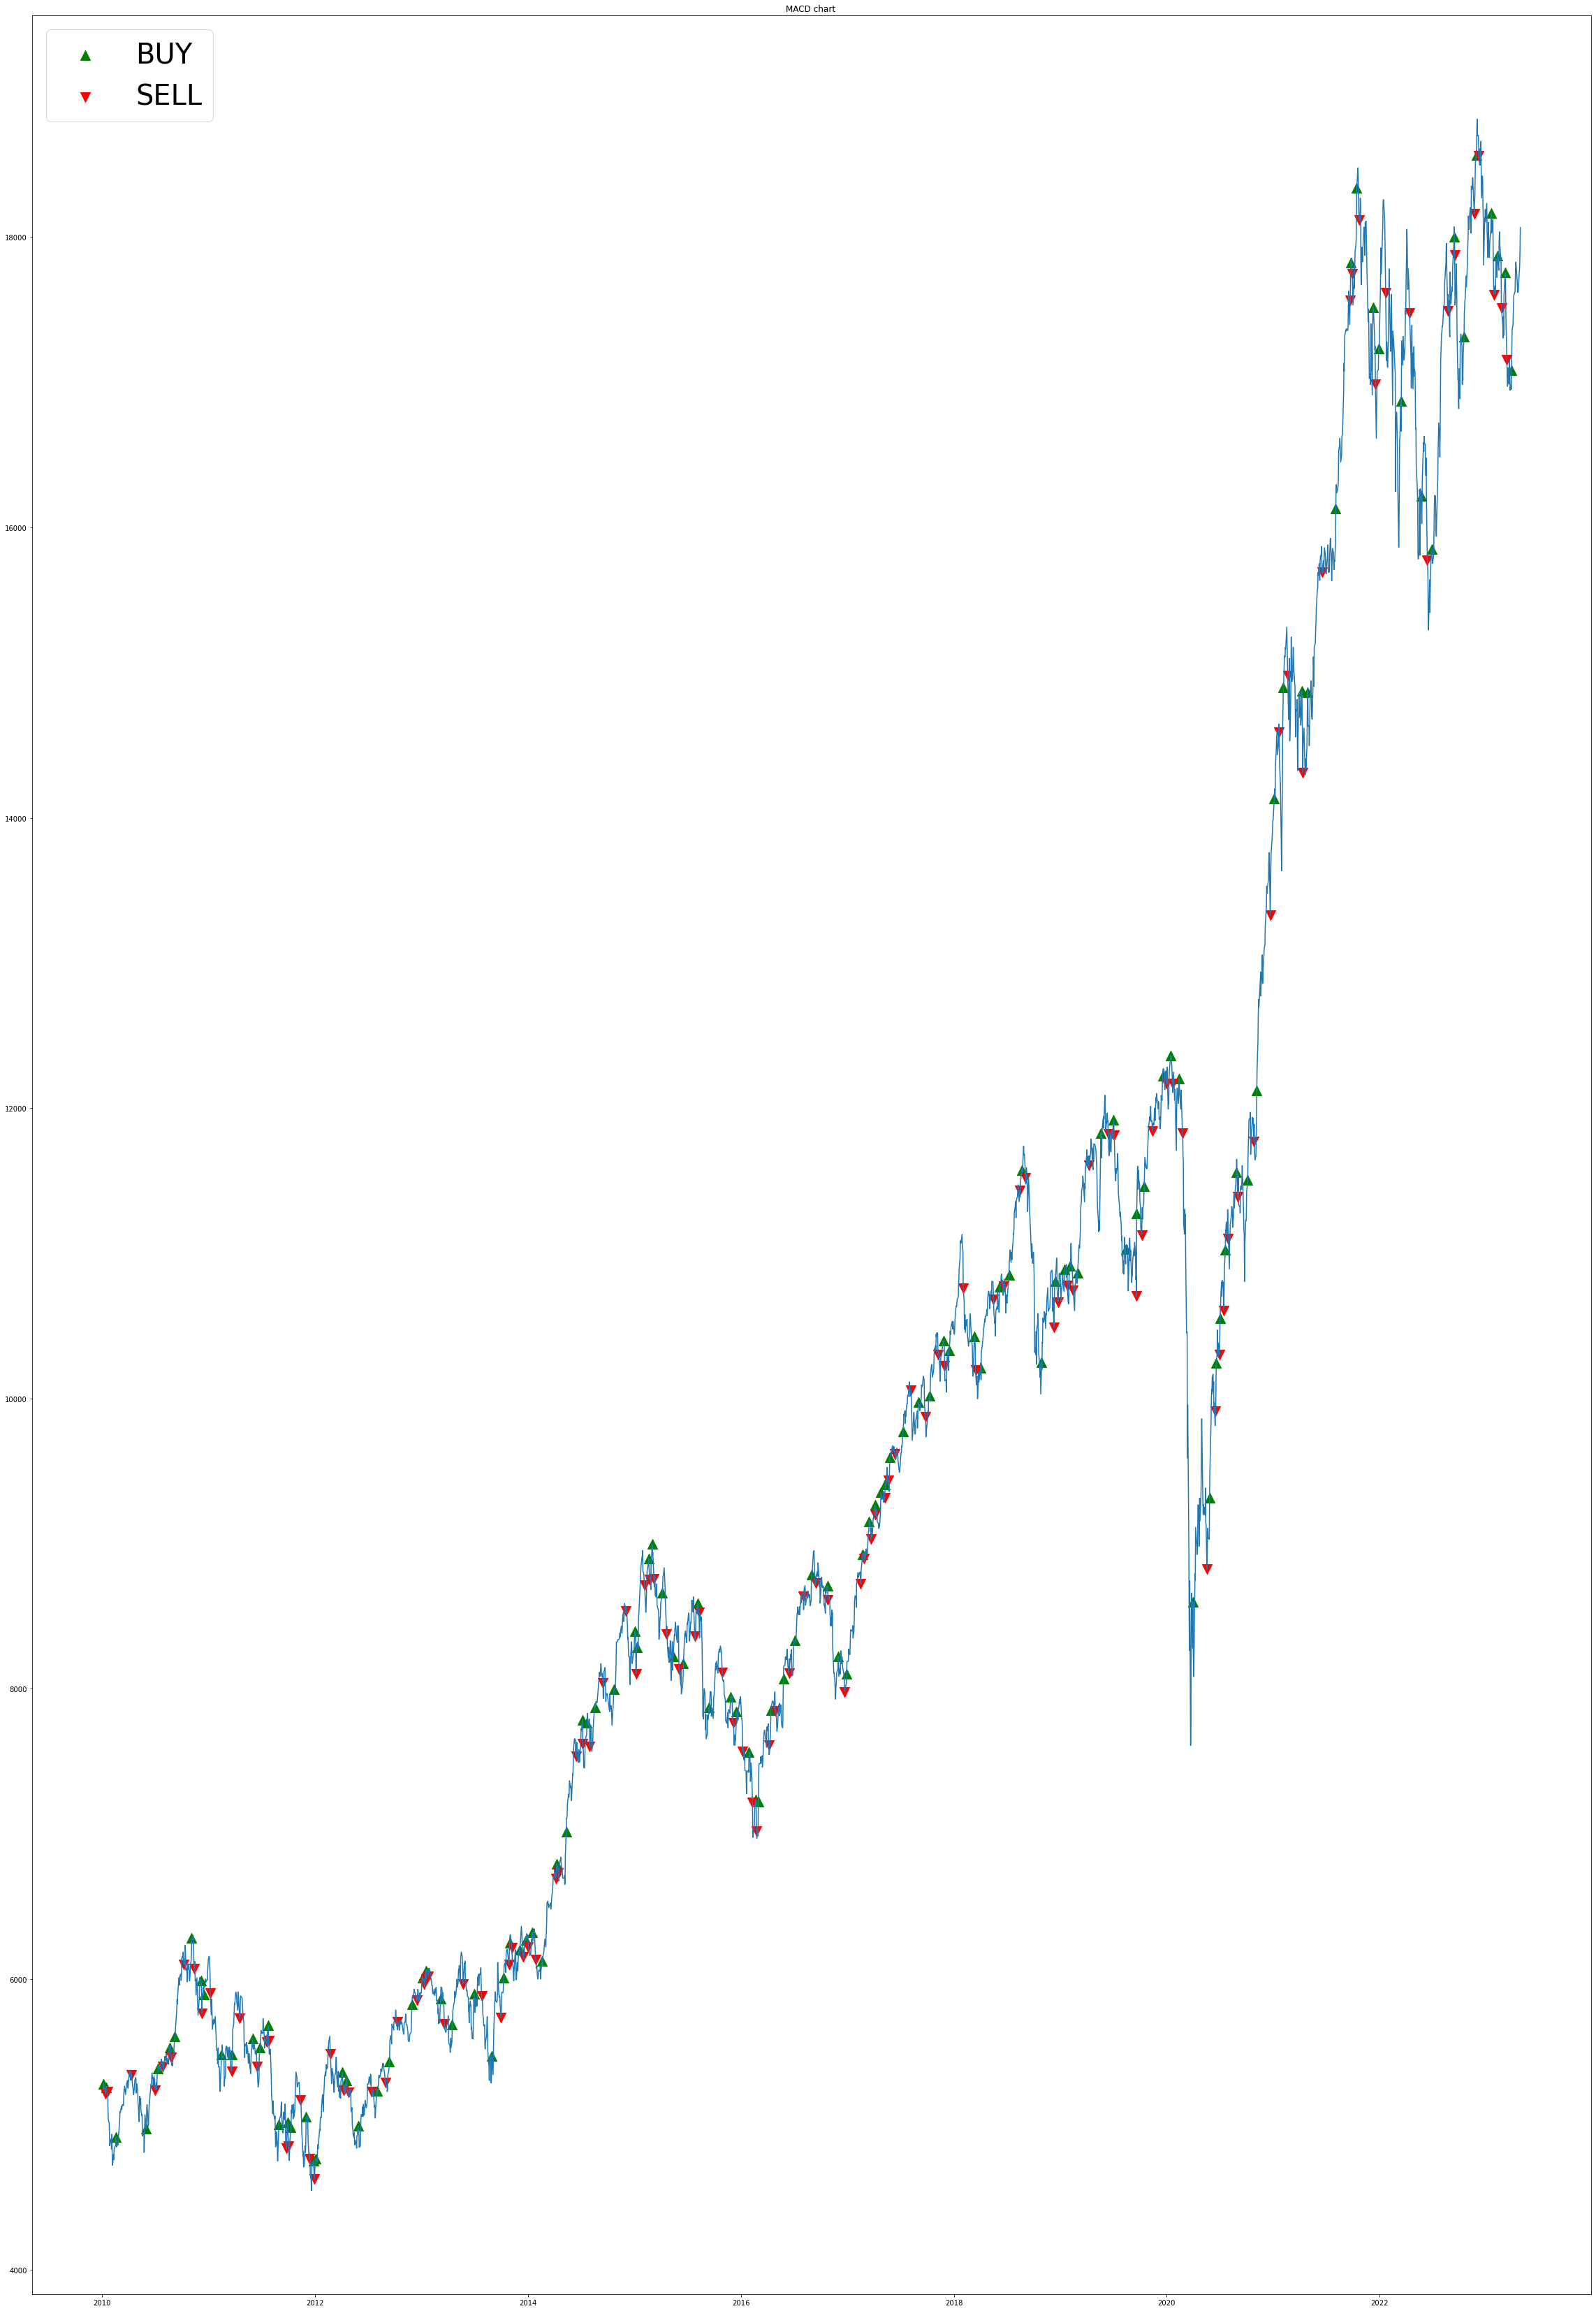

In [34]:
plt.figure(figsize=(40,60))
plt.plot( data['Close'])
plt.title('Price chart (Close) ')
plt.title('MACD chart ')
plt.scatter(data.index, data.buy_sig, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(data.index, data.sell_sig, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.legend(fontsize="40")
plt.show()

In [35]:
np_buy_md=np_buy_md[:-1]
(np_sell_md-np_buy_md).mean()

68.15570568647541

In [36]:
def sharpe_ratio(data, risk_free_rate=0.03):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_return/sigma)

sharpe_ratio(np_sell_md-np_buy_md)

0.18582581794601735

In [37]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np_sell_md-np_buy_md)

0.49121611330743065

In [38]:
pd.DataFrame(np_buy_md-np_sell_md).idxmin()
print("MDD_MACD",(np_buy_md-np_sell_md).min()/np_sell_md[22,0]*100,"%")
print("CUMM_Return_MACD",((np_sell_md-np_buy_md)/np_buy_md).max()*100,"%")

MDD_MACD -31.411238626224957 %
CUMM_Return_MACD 15.06725766327907 %


[*********************100%***********************]  1 of 1 completed


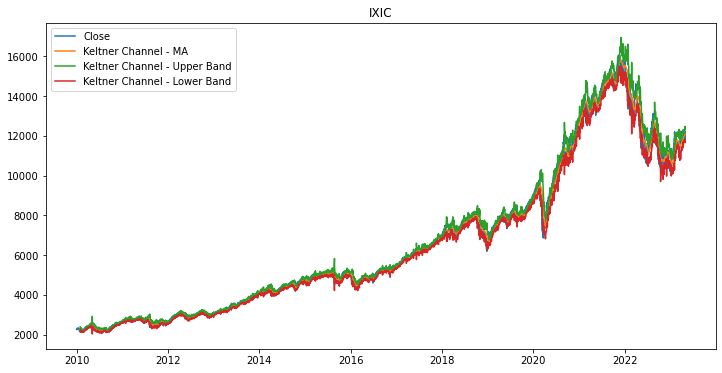

In [39]:
data=yf.download('^IXIC', start='2010-1-1', end='2023-5-1')
data['KC_MA'] = data['Close'].rolling(window=20).mean()
data['KC_ATR'] = data['High'] - data['Low']
data['KC_UB'] = data['KC_MA'] + (2 * data['KC_ATR'])
data['KC_LB'] = data['KC_MA'] - (2 * data['KC_ATR'])
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close')
plt.plot(data['KC_MA'], label='Keltner Channel - MA')
plt.plot(data['KC_UB'], label='Keltner Channel - Upper Band')
plt.plot(data['KC_LB'], label='Keltner Channel - Lower Band')
plt.title("IXIC")
plt.legend()
plt.show()


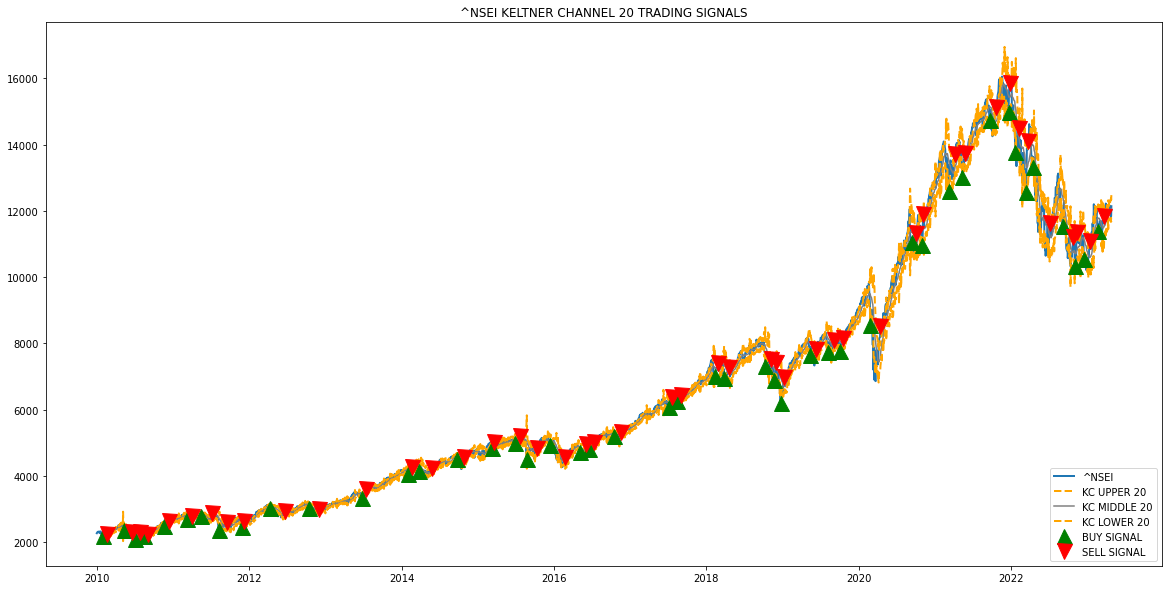

In [40]:
def implement_kc_strategy(prices, kc_upper, kc_lower):
    buy_price = []
    sell_price = []
    kc_signal = []
    signal = 0
    
    for i in range(prices.shape[0]-1):
        if prices[i] < kc_lower[i] and prices[i+1] > prices[i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        elif prices[i] > kc_upper[i] and prices[i+1] < prices[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            kc_signal.append(0)
            
    return buy_price, sell_price, kc_signal
buy_price, sell_price, kc_signal = implement_kc_strategy(data['Close'], data['KC_UB'], data['KC_LB'])
data=data.iloc[:-1,:]

plt.figure(figsize=(20,10))
plt.plot(data['Close'], linewidth = 2, label = '^NSEI')
plt.plot(data['KC_UB'], linewidth = 2, color = 'orange', linestyle = '--', label = 'KC UPPER 20')
plt.plot(data['KC_MA'], linewidth = 1.5, color = 'grey', label = 'KC MIDDLE 20')
plt.plot(data['KC_LB'], linewidth = 2, color = 'orange', linestyle = '--', label = 'KC LOWER 20')
plt.plot(data.index, buy_price, marker = '^', color = 'green', markersize = 15, linewidth = 0, label = 'BUY SIGNAL')
plt.plot(data.index, sell_price, marker = 'v', color= 'r', markersize = 15, linewidth = 0, label = 'SELL SIGNAL')
plt.legend(loc = 'lower right')
plt.title('^NSEI KELTNER CHANNEL 20 TRADING SIGNALS')
plt.show()

In [41]:
buy_kc=pd.DataFrame(buy_price)
buy_kc=buy_kc.fillna(0)
buy_kc=buy_kc[~(buy_kc == 0).all(axis=1)]
sell_kc=pd.DataFrame(sell_price)
sell_kc=sell_kc.fillna(0)
sell_kc=sell_kc[~(sell_kc == 0).all(axis=1)]
np1=np.array(buy_kc)
np2=np.array(sell_kc)
(np2-np1).mean()
(np2-np1).std()
buy_kelt=pd.DataFrame(buy_price)
sell_kelt=pd.DataFrame(sell_price)
buy_kelt=buy_kelt.fillna(0)
sell_kelt=sell_kelt.fillna(0)

In [42]:
import math
def sharpe_ratio(data, risk_free_rate=0):
    # Calculate Average  Return
    mean_daily_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_daily_return/sigma)
sharpe_ratio(np2-np1)

0.5976486064357287

In [43]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np2-np1)

0.5014334031325502

In [44]:
print("MDD_KC",(np1-np2).min()/np2[18,0]*100,"%")
print("CUMM_Return_KC",((np2-np1)/np1).max()*100,"%")

MDD_KC -33.42224848831951 %
CUMM_Return_KC 12.807365707122075 %


Parameter Optimisation

In [45]:
nasdaq = pd.DataFrame()
nsei = pd.DataFrame()
nasdaq['Close'] = merged_df['Close_x']
nifty['Close'] = merged_df['Close_y']
nasdaq['Low'] = merged_df['Low_x']
nifty['Low'] = merged_df['Low_x']
nasdaq['High'] = merged_df['High_x']
nasdaq = nasdaq.reset_index()
nifty = nifty.reset_index()

In [46]:
from sklearn.model_selection import GridSearchCV
import ta
from sklearn.base import BaseEstimator
# Custom estimator class for Keltner Channel
class KeltnerChannelEstimator(BaseEstimator):
    def __init__(self, window):
        self.window = window

    def fit(self, X, y=None):
        indicator = ta.volatility.KeltnerChannel(X['Close'], X['Low'], X['Close'], window=self.window, fillna=True)
        return self

# Custom estimator class for Bollinger Bands
class BollingerBandsEstimator(BaseEstimator):
    def __init__(self, window):
        self.window = window

    def fit(self, X, y=None):
        indicator = ta.volatility.BollingerBands(X['Close'], window=self.window, fillna=True)
        return self
# Custom estimator class for MACD

class MACDEstimator(BaseEstimator):
    def __init__(self, window_slow, window_fast):
        self.window_slow = window_slow
        self.window_fast = window_fast

    def fit(self, X, y=None):
        indicator = ta.trend.MACD(X['Close'], window_slow=self.window_slow, window_fast=self.window_fast, fillna=True)
        return self


nsei_data = nifty
# Define the parameter grid for each indicator
keltner_params = {'window': [10, 20, 30]}
bollinger_params = {'window': [10, 20, 30]}
macd_params = {'window_slow': [26, 30, 34], 'window_fast': [12, 14, 16]}

ixic_data = nasdaq
# Define the scoring metrics for evaluation
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall'}

# Perform grid search for Keltner Channel
keltner_grid = GridSearchCV(estimator=KeltnerChannelEstimator(window=10), param_grid=keltner_params, scoring=scoring, refit=False)
keltner_grid.fit(ixic_data)
keltner_results = pd.DataFrame(keltner_grid.cv_results_)

# Perform grid search for Bollinger Bands
bollinger_grid = GridSearchCV(estimator=BollingerBandsEstimator(window=10), param_grid=bollinger_params, scoring=scoring, refit=False)
bollinger_grid.fit(ixic_data)
bollinger_results = pd.DataFrame(bollinger_grid.cv_results_)


 # Create an instance of MACDEstimator
macd_estimator = MACDEstimator(window_slow=26, window_fast=12)

macd_grid = GridSearchCV(estimator=macd_estimator, param_grid=macd_params, scoring=scoring, refit=False)
macd_grid.fit(ixic_data)
macd_results = pd.DataFrame(macd_grid.cv_results_)



# Evaluate the grid search results
keltner_best_params = keltner_results.loc[keltner_results['rank_test_accuracy'] == 1, 'params'].values[0]
bollinger_best_params = bollinger_results.loc[bollinger_results['rank_test_accuracy'] == 1, 'params'].values[0]
macd_best_params = macd_results.loc[macd_results['rank_test_accuracy'] == 1, 'params'].values[0]

print("Optimized Parameters:")
print("Keltner Channel:", keltner_best_params)
print("Bollinger Bands:", bollinger_best_params)
print("MACD:", macd_best_params)

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shiva\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
  File "C:\Users\shiva\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
TypeError: _score() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\shiva\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shiva\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shiva\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
  File "C:\Users\shiva\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
TypeError: _score() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\shiva\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shiva\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score

Optimized Parameters:
Keltner Channel: {'window': 10}
Bollinger Bands: {'window': 10}
MACD: {'window_fast': 12, 'window_slow': 26}


C:\Users\shiva\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shiva\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
  File "C:\Users\shiva\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
TypeError: _score() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\shiva\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shiva\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score

Signal Generation

In [47]:
# Apply the optimized parameters to the indicators
keltner_indicator = ta.volatility.KeltnerChannel(ixic_data['Close'], ixic_data['Low'], ixic_data['Close'], window=keltner_best_params['window'], fillna=True)
bollinger_indicator = ta.volatility.BollingerBands(ixic_data['Close'], window=bollinger_best_params['window'], fillna=True)
macd_indicator = ta.trend.MACD(ixic_data['Close'], window_slow=macd_best_params['window_slow'], window_fast=macd_best_params['window_fast'], fillna=True)

# Generate buy and sell signals
keltner_signal = np.where(ixic_data['Close'] > keltner_indicator.keltner_channel_hband(), 1, 0)  # Buy signal
bollinger_signal = np.where(ixic_data['Close'] < bollinger_indicator.bollinger_lband(), -1, 0)  # Sell signal
macd_signal = np.where(macd_indicator.macd() > macd_indicator.macd_signal(), 1, -1)  # Buy and sell signals based on MACD histogram


# Combine the signals
combined_signal = keltner_signal + bollinger_signal + macd_signal

# Record the signals, dates, and calculate returns
signals = pd.DataFrame({
    'Date': ixic_data['Date'],
    'Signal': combined_signal
})

# Calculate the returns
signals['Return'] = signals['Signal'].shift(-1) * ixic_data['Close'].pct_change()

# Calculate additional metrics
total_trades = signals.shape[0]
positive_trades = signals[signals['Return'] > 0].shape[0]
negative_trades = signals[signals['Return'] < 0].shape[0]
win_rate = positive_trades / total_trades * 100

# Print the signals and metrics
print("Generated Signals:")
print(signals)

print("\nMetrics:")
print("Total Trades:", total_trades)
print("Positive Trades:", positive_trades)
print("Negative Trades:", negative_trades)
print("Win Rate (%):", win_rate)

Generated Signals:
           Date  Signal    Return
0    2010-01-04      -1       NaN
1    2010-01-05       1 -0.000126
2    2010-01-06      -1  0.003300
3    2010-01-07      -1 -0.000904
4    2010-01-08       2  0.007443
...         ...     ...       ...
3177 2023-04-24      -1  0.005841
3178 2023-04-25      -2  0.019775
3179 2023-04-26      -1  0.000000
3180 2023-04-27       0  0.000000
3181 2023-04-28       0       NaN

[3182 rows x 3 columns]

Metrics:
Total Trades: 3182
Positive Trades: 1808
Negative Trades: 1051
Win Rate (%): 56.8196103079824


In [48]:

# Apply the optimized parameters to the indicators
keltner_indicator = ta.volatility.KeltnerChannel(nsei_data['Close'], nsei_data['Low'], nsei_data['Close'], window=keltner_best_params['window'], fillna=True)
bollinger_indicator = ta.volatility.BollingerBands(nsei_data['Close'], window=bollinger_best_params['window'], fillna=True)
macd_indicator = ta.trend.MACD(nsei_data['Close'], window_slow=macd_best_params['window_slow'], window_fast=macd_best_params['window_fast'], fillna=True)

# Generate buy and sell signals
keltner_signal = np.where(nsei_data['Close'] > keltner_indicator.keltner_channel_hband(), 1, 0)  # Buy signal
bollinger_signal = np.where(nsei_data['Close'] < bollinger_indicator.bollinger_lband(), -1, 0)  # Sell signal
macd_signal = np.where(macd_indicator.macd() > macd_indicator.macd_signal(), 1, -1)  # Buy and sell signals based on MACD histogram


# Combine the signals
combined_signal = keltner_signal + bollinger_signal + macd_signal

# Record the signals, dates, and calculate returns
signals = pd.DataFrame({
    'Date': nsei_data['Date'],
    'Signal': combined_signal
})

# Calculate the returns
signals['Return'] = signals['Signal'].shift(-1) * nsei_data['Close'].pct_change()

# Calculate additional metrics
total_trades = signals.shape[0]
positive_trades = signals[signals['Return'] > 0].shape[0]
negative_trades = signals[signals['Return'] < 0].shape[0]
win_rate = positive_trades / total_trades * 100

# Print the signals and metrics
print("Generated Signals:")
print(signals)

print("\nMetrics:")
print("Total Trades:", total_trades)
print("Positive Trades:", positive_trades)
print("Negative Trades:", negative_trades)
print("Win Rate (%):", win_rate)

Generated Signals:
           Date  Signal    Return
0    2010-01-04      -1       NaN
1    2010-01-05       1  0.008734
2    2010-01-06       1  0.000739
3    2010-01-07       1 -0.003540
4    2010-01-08       1 -0.003487
...         ...     ...       ...
3263 2023-04-24       1  0.006772
3264 2023-04-25       1  0.001457
3265 2023-04-26       1  0.002496
3266 2023-04-27       1  0.005695
3267 2023-04-28       1       NaN

[3268 rows x 3 columns]

Metrics:
Total Trades: 3268
Positive Trades: 1957
Negative Trades: 1205
Win Rate (%): 59.883720930232556
